In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

In [9]:
order = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
year = dt.datetime.strptime(order[0], "%Y-%m-%d")- dt.timedelta(days=366)
date_query=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=year).all()

df_rain =pd.DataFrame(date_query, columns = ["date", "rain"])
df_rain.describe()

,rain
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


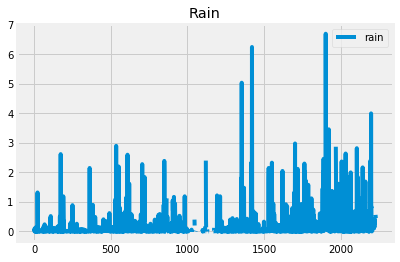

In [10]:
df_rain.plot(title="Rain")
plt.legend(loc="best")
plt.savefig("rain.png")
plt.show()

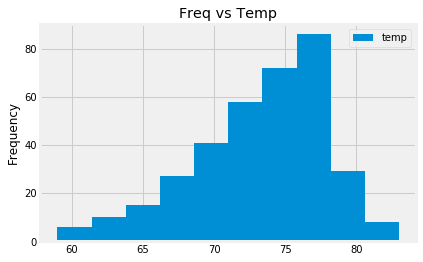

In [13]:
stations_query = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
temp_query = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == stations_query[0][0]).all()

tempstats = session.query(Measurement.station,func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()
year_query = session.query(Measurement.tobs).filter(Measurement.date>=year).filter(Measurement.station == tempstats [0]).all()
ddf_temp = pd.DataFrame(year_query, columns=["temp"])

ddf_temp.plot.hist(title = "Freq vs Temp")
plt.savefig("freq_temp.png")
plt.show()